# 머신러닝 개요

* 머신러닝이란?

기계(컴퓨터 알고리즘) 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정이라고 정의할 수 있다. 해결하려는 문제에 따라 예측(prediction), 분류(classification), 군집(clustering) 알고리즘 등으로 분류된다. 예를 들면, 주가, 환률 등 경계지표 예측, 은행에서 고객을 분류하여 대출을 승인하거나 거절하는 문제, 비슷한 소비패턴을 가진 고객 유형을 군집으로 묶어내는 문제 등이 있다.

* 지도 학습 vs 비지도 학습

머신러닝은 크게 두 가지 유형으로 분류한다. 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식을 지도 학습(supervised learning)이라고 하고, 정답 데이터없이 컴퓨터 알고리즘 스스로 데이터로부터 숨은 패턴을 찾아내는 방법을 비지도 학습(unsupervised learning)이라고 한다.
지도 학습에는 회귀 분석, 분류 모형이 있고, 비지도 학습 중에는 군집 분석이 대표적인 방법이다.

* 머신러닝 프로세스

머신러닝 데이터 분석을 시작하기 전에 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터를 변환하는 작업이 선행되어야 한다. 분석 대상에 관해 수집한 관측값(observation)을 속성(feature 또는 variable)을 기준으로 정리한다. 따라서 판다스를 이용하여 데이터프레임으로 정리하는 과정이 필요하다. 데이터프레임의 열은 속성을 나타내는 변수들이 위치하고, 데이터프레임의 행은 하나의 관측값을 나타낸다. 분석 대상에 대한 관측값의 개수만큼 행을 늘리면 된다.

컴퓨터 알고리즘이 이해할 수 있도록 데이터프레임으로 변환한 다음에는 여러 속성(변수) 간의 관계를 분석하여 결과를 예측하는 모형을 학습을 통해 찾는다. 모형 학습에 사용하는 데이터를 훈련 데이터(train data)라고 부른다. 학습을 마친 모형의 예측 능력을 평가하기 위한 데이터를 검증 데이터(test data)라고 말한다. 검증 과정을 통해 학습을 마친 모형의 예측 능력을 평가하고, 평가 결과를 바탕으로 최종 모형을 확정하여 문제 해결에 적용한다.


---

데이터 정리 -> 데이터 분리(훈련/검증) -> 알고리즘 준비 -> 모형 학습(훈련 데이터) -> 예측(검증 데이터) -> 모형 평가 -> 모형 활용

---

# 회귀분석

회귀분석(regression)은 머신러닝 알고리즘 중에서도 비교적 이해하기 쉽고, 널리 활용되고 있는 대표적인 알고리즘이다. 가격, 매출, 주가, 환률, 수량 등 연속적인 값을 갖는 연속 변수를 예측하는 주로 활용된다. 분석 모형이 예측하고자 하는 목표를 종속(dependent) 변수 또는 예측(predictor) 변수라고 부른다. 그리고 예측을 위해 모형이 사용되는 속석을 톡립(independent) 변수 또는 설명(explanatory) 변수라고 한다.

---

설명(독립) 변수 -- 학습 --> 머신러닝 알고리즘 -- 예측 --> 예측(종속) 변수

---

* 단순회귀분석

일반적으로 소득이 증가하면 소비가 증가하는 것처럼, 어떤 변수(독립 변수 X)가 다른 변수(종족 변수 Y)에 영향을 준다면 두 변수 사이에 선형 관계가 있다고 이야기한다. 이와 같은 선형관계를 알고 있다면 새로운 독립 변수 X 값이 주어졌을 때 거기에 대응되는 종속 변수 Y 값을 예측할 수 있다. 이처럼 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 단순회귀분석(Simple Linear Regression)이라고 말한다. 대표적인 지도학습 유형이다.

수학적으로는 종속 변수 Y와 독립 변수 X 사이의 관계를 1차함수 Y=aX+b로 나타낸다. 단순회귀분석 알고리즘은 훈련 데이터를 이용하여 직선의 기울기(a)와 직선이 y축과 교차하는 지점인 y절편(b)을 반복 학습을 통해 찾는다. 다시 말해 변수 X와 Y에 대한 정보를 가지고, 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘이다.

#### Step 1 - 데이터 준비

In [1]:
# Step 1 - 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('경로/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Step 2 - 데이터 탐색

In [2]:
# Step 2 - 데이터 탐색
# 데이터에 대한 기본적인 정보를 확인한다. info() 메소드로 데이터의 자료형과 개수를 확인하고, describe() 메소드를 실행하여 주요 통계 정보를 확인

print(df.info()) 
print()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None



,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


describe() 메소드의 실행 결과에 엔진출력을 나타내는 'horsepower'열이 포함되지 않는다. => 'horsepower' 열의 자료형이 문자열(object)이므로 숫자형이므로 변결할 필요가 있음!!

이를 위해 'horsepower' 열의 고유값 중에서 누락 데이터를 뜻하는 '?' 문자가 있는 행들을 찾아서 제거하고, astype() 메소드로 실수형으로 변환한다.

In [3]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
display(df['horsepower'].unique()) # horsepower 열의 고유값 확인
print()

df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # dropna subset으로 선택한 columns에 대해서 NaN 값인 행(axis=0)/열(axis=1) 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

display(df.describe())
print()
print(df.info()) # 3   horsepower    392 non-null    float64

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None


#### Step 3 - 속성 선택

In [4]:
# Step 3 - 속성 선택
# 단순회귀분석에 변수로 사용할 후보 열을 선택한다. 예측 목표인 종속 변수(Y)가 될 'mpg'열과 
# 독립 변수(X)로 사용할 후보로 3개의 열('cylinders', 'horsepower', 'weight')을 포함한다.

# 분석에 활용할 열(속성) 선택(연비(Y) / 실린더, 출력, 중량(X))
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


3개의 후보 중에서 단순회귀분석에 사용할 독립 변수를 선택한다. 종속 변수(Y)와 독립 변수(X) 간의 일대일 관계를 찾는 것이므로 두 변수 간에 선형관계가 있는지 그래프를 그려서 확인한다.

먼저 Matplotlib의 plot() 메소드에 kind='scatter' 옵션을 적용하여 산점도를 그린다. x축 데이터로 'cylinders', 'horsepower', 'weight' 열을 각각 지정하고, y축에는 'mag'열을 지정하여 두 변수 간의 상관성을 보자.

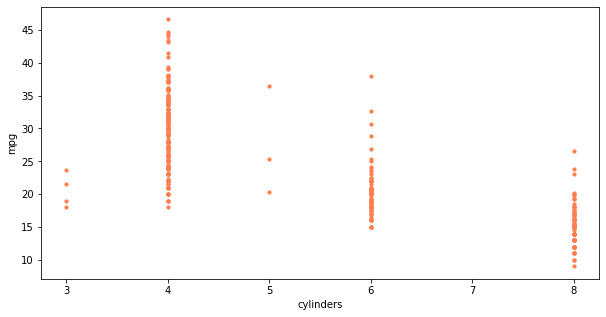

In [5]:
# 종속 변수 Y인 '연비(mpg)'와 다른 변수 간의 선형 관계를 그래프(산점도)로 확인
ndf.plot(kind='scatter', x='cylinders', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

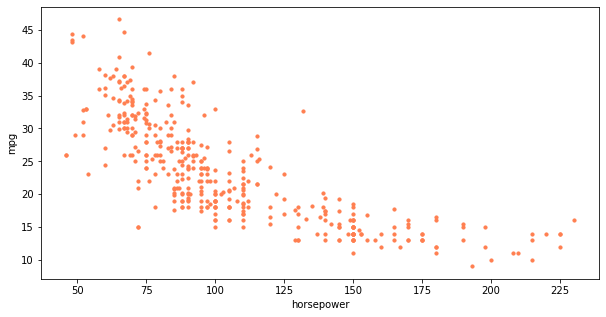

In [6]:
# 종속 변수 Y인 '연비(mpg)'와 다른 변수 간의 선형 관계를 그래프(산점도)로 확인
ndf.plot(kind='scatter', x='horsepower', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

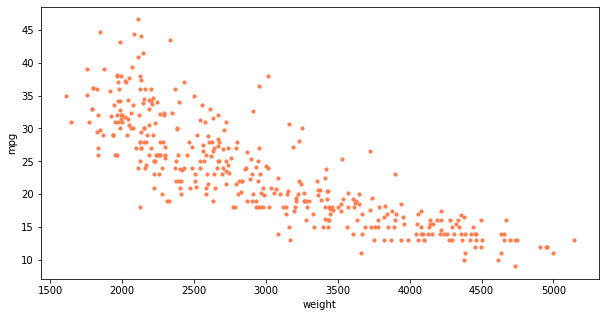

In [7]:
# 종속 변수 Y인 '연비(mpg)'와 다른 변수 간의 선형 관계를 그래프(산점도)로 확인
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

변수 Y인 연비 "mpg"와 X축 중량 "weight"의 산점도 그래프에서 가장 선형적인 관계를 가지는 것으로 보인다.

이번에는 Seaborn 라이브러리의 regplot() 함수를 이용하여 두 변수에 대한 산점도를 그린다. 기본적으로 회귀선을 표시한다. 회귀선을 제거하려면 fit_reg=False 옵션을 적용한다.

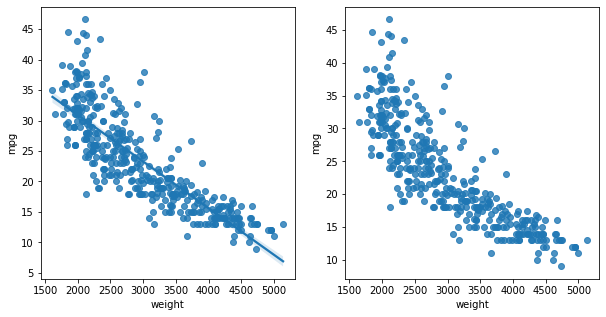

In [8]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

산점도를 그릴 때 Seaborn 라이브러리의 jointplot() 함수를 이용할 수도 있다. 두 변수의 히스토그램이 x, y축에 별도로 표시되는 특징이 있다. kind='reg' 옵션을 사용하면 회귀선을 표시한다.

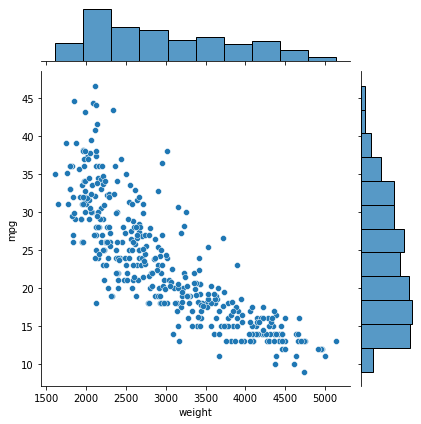

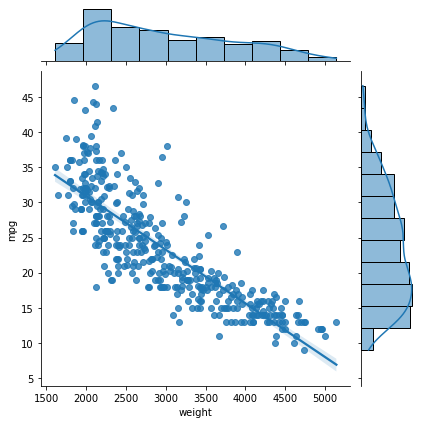

In [9]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

이번에는 Seaborn 라이브러리의 pairplot() 함수를 사용하여 데이터프레임의 열을 두 개씩 짝을 지을 수 있는 모든 경우의 수에 대하여 두 변수 간의 산점도를 그린다. 단, 자기 자신과의 관계는 히스토그램으로 표시된다.

위 경우 각 변수에 대하여 하나씩 그래프를 그리는 것이지만, pairplot() 함수를 사용하면 한번에 모든 경우의 수에 대하여 그래프를 나타낼 수 있다.

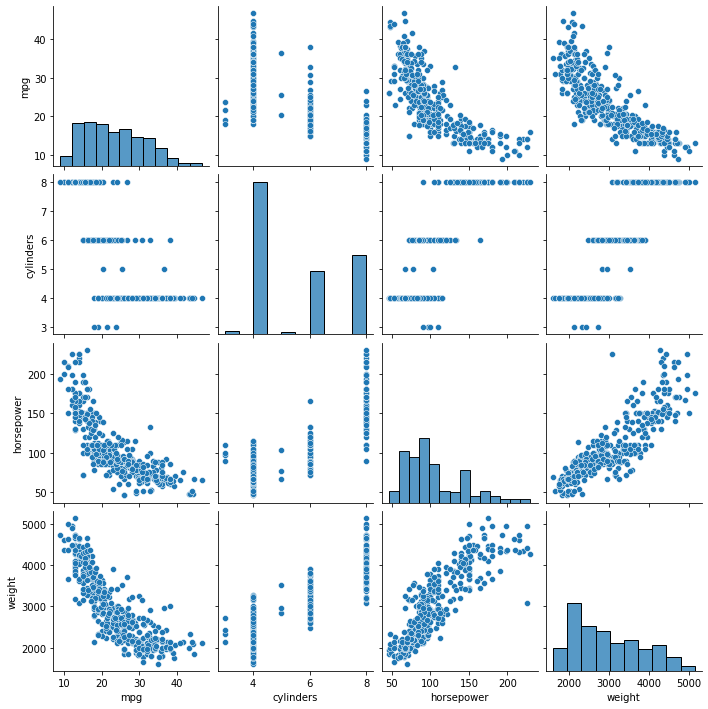

In [10]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

#### Step 4 - 훈련/검증 데이터 분할

위에서 그린 산점도에서 'mpg' 열과 선형관계를 보이는 'horsepower' 열과 'weight' 열을 독립 변수 X로 선택하는 것을 고려한다. 다음은 두 변수 간의 회귀방정식을 찾을 차례이다. 훈련 데이터와 검증 데이터로 나눠서 모형을 구축한다.

'weight'열을 독립 변수 X로 선택하고 데이터를 7:3의 비율로 분할한다. -> 훈련 데이터 274개, 검증 데이터 118개로 나뉜다.

In [11]:
# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 Series(or list), array, DataFrame
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30% / train_size=None 일경우 default는 test_size
                                                    random_state=10) #랜덤 추출 값

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


#### Step 5 - 모형 학습 및 검증

sklearn 라이브러리에서 선형회귀분석 모듈을 사용한다. LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 변수 lr에 저장한다. 모형 객체(lr)에 fit() 메소드를 적용하여 훈련 데이터(X_train, y_train)를 전달하면 모형이 학습을 통해 회귀 방정식의 계수 a, b를 찾는다.

학습을 마친 모형의 예측 능력을 평가하기 위해 검증 데이터를 score() 메소드에 전달하여 lr 모형의 결정계수(R-제곱)를 구한다. 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단한다.

In [12]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


회귀선의 관계식 즉, 회귀방정식을 구성하는 계수 a, b를 확인할 수 있다. 계수 a는 회귀식의 기울기를 나타내고, 모형 객체 lr의 coef_ 속성값이다. 계수 b는 y 절편이고, 모형 객체 lr의 intercept_ 속성값이다.

In [13]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print()

# 회귀식의 y 절편
print('y 절편 b: ', lr.intercept_)

기울기 a:  [-0.00775343]

y 절편 b:  46.7103662572801


모형이 예측한 결과와 실제 값을 비교해본다. 독립 변수 전체 데이터(X)를 predict() 메소드에 입력하여 모형이 반환하는 예측값을 y_hat에 저장한다. 실제 값 y와 모형의 예측값 y_hat을 같은 화면에 분포도를 그려서 비교한다. Seaborn 라이브러이의 distplot() 함수를 사용한다.

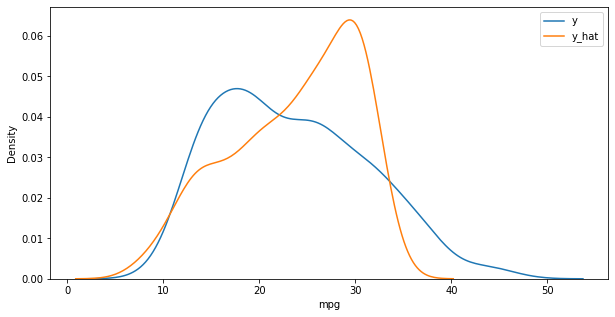

In [14]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

위 결과를 보면 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보인다. 따라서 독립 변수(weight)와 종속 변수(mpg) 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보인다. 위에서 그린 산점도를 보면 직선보다는 곡선의 형태가 더 적합해 보인다. 이럴 경우 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있다.

* 다항회귀분석

단순회귀분석은 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘이다. 독립 변수 X와 종속 변수 Y 사이에 선형의 상관관계가 있지만, 직선보다는 곡선으로 설명하는 것이 적합할 때는 단순회귀분석은 부적합하다. 이렬 때 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.

다항회귀분석(Polynomial Regression)은 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘이다. 예를 들면, 2차 함수는 종속 변수 Y와 독립 변수 X 사이의 관계를 Y = aX^2 + bX + c로 표시하여 설명한다. 다항회귀분석 모형은 학습을 통해 3개의 계수 a, b, c를 찾아서 모형을 완성한다.

#### 데이터 준비, 데이터 탐색, 속성 선택, 데이터셋 구분

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('경로/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']] #독립 변수 X, 데이터프레임
y=ndf['mpg']      #종속 변수 Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("훈련 데이터: ", X_train.shape)
print("검증 데이터: ", X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


#### 모형 학습 및 검증

sklearn 라이브러리에서 선형회귀분석을 위한 LinearRegression() 함수와 다항식 변환을 위한 PolynomiaFeatures() 함수를 불러온다. 그리고 PolynomiaFeatures(degree=2) 명령으로 2차항 객체인 poly를 생성한다. 독립 변수로 사용할 X_train 데이터를 fit_transform() 메소드에 전달하면 2차항 회귀분석에 맞게 변환된다. X_train의 1개 열이 x_train_poly에서는 3개의 열로 늘어난다.


In [16]:
# Step 5 - 비선형회귀분석 모형
from sklearn.linear_model import LinearRegression    # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 객체 생성
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형

print("원본 데이터 : ", X_train.shape)
print("2차항 변환 데이터 : ", X_train_poly.shape)

원본 데이터 :  (274, 1)
2차항 변환 데이터 :  (274, 3)


LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 변수 pr에 저장한다. 2차항으로 변환된 훈련 데이터(X_train_poly, y_train)를 fit() 메소드에 전달하여 pr 모형을 학습시킨다. 모형 학습 완료 후 검증 데이터를 사용하여 모형의 예측 능력을 평가한다. 검증 데이터 또한 poly 객체를 사용하여 2차항으로 변환해주어야 한다. score() 메소드로 모형의 결정계수(R-제곱)를 구한다.

In [17]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975479


훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교한다. 2차항으로 변환된 검증 데이터(X_test_poly)를 predict() 메소드에 입력하여 예측한 결과인 y_hat_test를 빨간 점('+')으로 표시하면 회귀선이 된다. 모형의 결정계수(R-제곱)가 높아진 것에서 알 수 있듯이 직선으로 표시된 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명한다고 말할 수 있다.

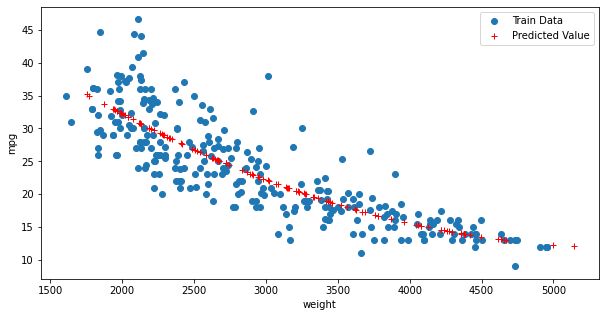

In [18]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data')         # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

모형이 예측한 결과와 실제 값을 비교한다. 데이터셋의 전제 x 데이터를 2차항으로 변환하여 predict() 메소드에 전달한다. 여기서 모형이 예측한 값을 y_hat에 저장한다. Seaborn 라이브러리의 distplot() 함수를 사용하여 실제 값 y와 예측값 y_hat의 분포 차이를 비교한다.

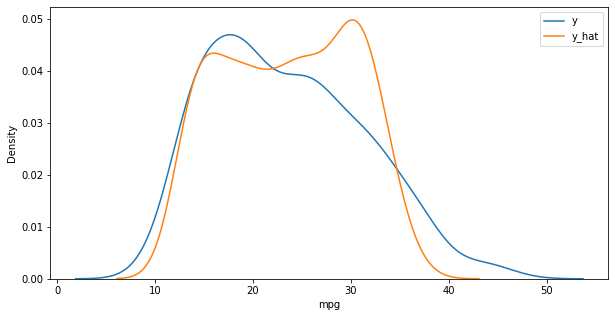

In [19]:
# 모형에 전체 X 데이터를 넣어 예측한 값 y_hat 을 실제 값 y와 비교
x_poly = poly.fit_transform(X) # X 데이터를 2차항으로 변환
y_hat = pr.predict(x_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()